In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

2024-08-08 22:36:48.727162: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
# сформируем скомпрометированные датасеты
with open('datasets.txt', 'r') as file:
    records = [line.rstrip().split(' ') for line in file]
# print(type(records))
bad_article_records = []
for line in records:
    # print(line)
    if '99999.0' not in line:
        for i in range(len(line)):
            if '.' in line[i]:
                line[i] = f"{(float(line[i]) + np.random.uniform(0.6, 0.9)):.4f}"
        bad_article_records.append(line)
    # print(line)
# for line in records:
# print(line)
with open('datasets_bad_article.txt', 'w') as file:
    for line in bad_article_records:
        s = ' '.join(line) + '\n'
        file.write(s)

In [35]:
def get_X(datasets_file: str, sample_length: int):
    with open(datasets_file, 'r') as file:
        records = [line.rstrip().split() for line in file]
    X = []
    for line in records:
        n = len(line)
        if n >= sample_length:
            # print(line)
            for i in range(0, n - sample_length + 1, 2):
                # print(f"--> i={i} : {line[i : i + sample_length]}")
                X.append(np.array([float(f'{float(x):.4f}') for x in line[i : i + sample_length]]))
        # else:
        #     x = line[0]
        #     X.append(np.array([np.float32(x), np.float32(np.random.uniform(1.0, 4.0)), np.float32(x)]))
    X = np.vstack(X)
    return X


X = get_X("datasets.txt", 3)
X.shape

(101849, 3)

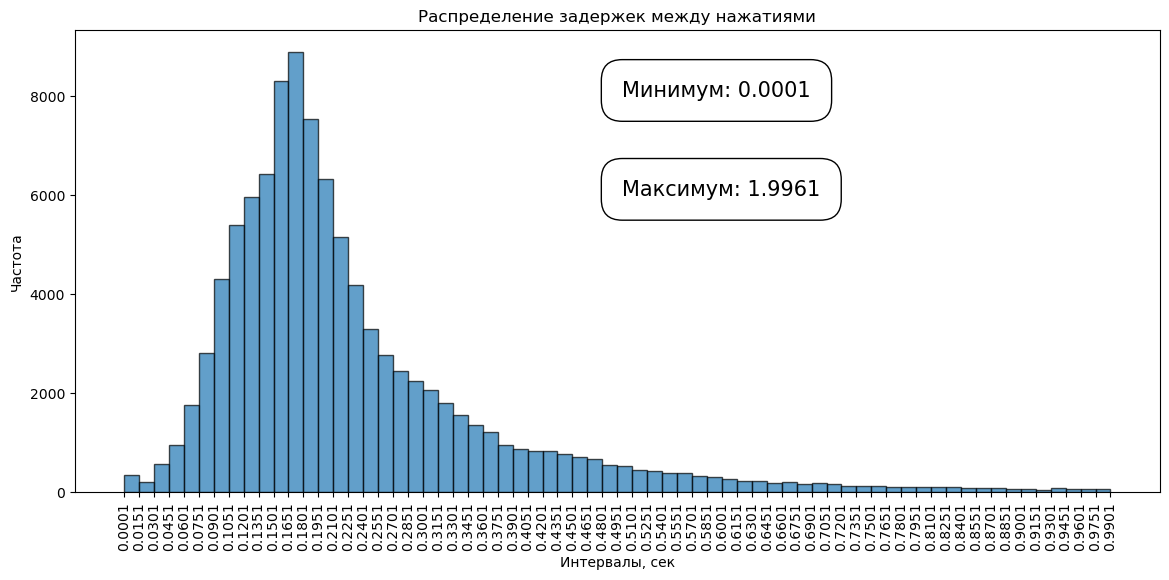

In [44]:
data = get_X('datasets.txt', 3)[:, 1]
mask = data != 99999.0
data = data[mask]

# Определение интервалов
bins = np.arange(0.0001, 1.0, 0.015)

# Построение гистограммы
hist, bin_edges = np.histogram(data, bins=bins)

# Вывод интервалов и соответствующих подсчетов
# for i in range(len(hist)):
#     print(f"От {bin_edges[i]} до {bin_edges[i+1]}: {hist[i]}")

# Построение графика
plt.figure(figsize=(14, 6))

plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Интервалы, сек')
plt.ylabel('Частота')
plt.title('Распределение задержек между нажатиями')

# plt.xticks(bins)
plt.xticks(bins, rotation=90)  # Установка меток оси X и их поворот на 90 градусов для лучшей читаемости
# plt.grid(axis='x', linestyle='--')  # Добавление сетки по оси X для лучшей визуализации

# Добавление рамки с минимальным и максимальным значениями
# Добавление рамки с минимальным и максимальным значениями
# print(data.min(), data.max())
plt.text(0.5, 8000, f"Минимум: {data.min():.4f}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(0.5, 6000, f"Максимум: {data.max():.4f}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()


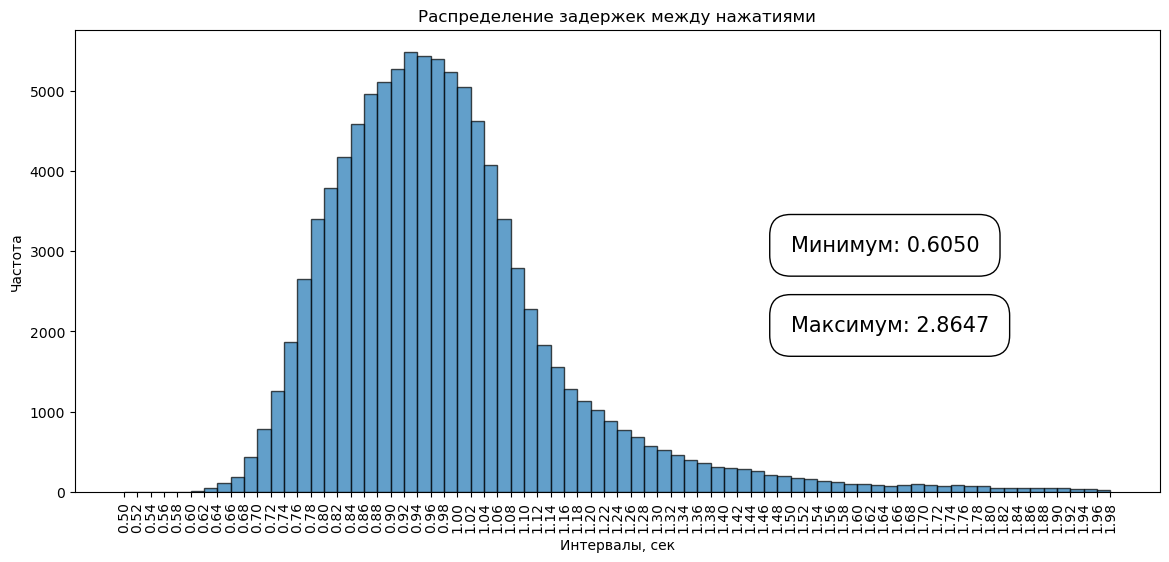

In [45]:
data = get_X('datasets_bad_article.txt', 3)[:, 1]
mask = data > 0.0001
data = data[mask]

# Определение интервалов
bins = np.arange(0.5, 2.0, 0.02)

# Построение гистограммы
hist, bin_edges = np.histogram(data, bins=bins)

# Вывод интервалов и соответствующих подсчетов
# for i in range(len(hist)):
#     print(f"От {bin_edges[i]} до {bin_edges[i+1]}: {hist[i]}")

# Построение графика
plt.figure(figsize=(14, 6))

plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Интервалы, сек')
plt.ylabel('Частота')
plt.title('Распределение задержек между нажатиями')

# plt.xticks(bins)
plt.xticks(bins, rotation=90)  # Установка меток оси X и их поворот на 90 градусов для лучшей читаемости
# plt.grid(axis='x', linestyle='--')  # Добавление сетки по оси X для лучшей визуализации

# Добавление рамки с минимальным и максимальным значениями
# print(data.min(), data.max())
plt.text(1.5, 3000, f"Минимум: {data.min():.4f}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(1.5, 2000, f"Максимум: {data.max():.4f}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()